In [1]:
import pandas as pd 
import numpy as np
import dask.dataframe as dd
import ProperDict as PropD
import dask
import os

In [2]:
# allows for long strings
pd.options.display.max_colwidth = 1000
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# disables setting on copy error
pd.options.mode.chained_assignment = None  # default='warn'

In [31]:
# total number of unique CIKs 
load = dd.read_csv('F:\LPS\SEC_DB\*\sub.tsv', sep='\t', sample=2500000)
cik = load.cik.compute()
len(cik)

C:\Users\Owner\AppData\Local\Programs\Python\Python39\lib\site-packages\dask\core.py:121: DtypeWarning: Columns (35,38) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


342722

In [27]:
%%time
tt = CompanyFilings(ticker='msft')

Wall time: 2.94 s


In [8]:
tt.sub

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,baph,countryma,stprma,cityma,zipma,mas1,mas2,countryinc,stprinc,ein,former,changed,afs,wksi,fye,form,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks,pubfloatusd,floatdate,floataxis,floatmems
2640,0001564590-21-002316,789019.0,MICROSOFT CORP,7372.0,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,425-882-8080,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,US,WA,911144442.0,NaN,NaN,1-LAF,False,0630,10-Q,20201231.0,2021.0,Q2,20210126.0,2021-01-26 16:10:00.0,False,True,msft-10q_20201231_htm.xml,1.0,NaN,NaN,NaN,NaN,NaN
3037,0001564590-20-047996,789019.0,MICROSOFT CORP,7372.0,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,425-882-8080,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,US,WA,911144442.0,NaN,NaN,1-LAF,False,0630,10-Q,20200930.0,2021.0,Q1,20201027.0,2020-10-27 16:22:00.0,False,True,msft-10q_20200930_htm.xml,1.0,NaN,NaN,NaN,NaN,NaN
4459,0001564590-20-034944,789019.0,MICROSOFT CORP,7372.0,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,425-882-8080,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,US,WA,911144442.0,NaN,NaN,1-LAF,True,0630,10-K,20200630.0,2020.0,FY,20200731.0,2020-07-30 20:45:00.0,False,True,msft-10k_20200630_htm.xml,1.0,NaN,1.200000e+12,20191231.0,NaN,NaN
3766,0001564590-20-019706,789019.0,MICROSOFT CORP,7372.0,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,425-882-8080,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,US,WA,911144442.0,NaN,NaN,1-LAF,False,0630,10-Q,20200331.0,2020.0,Q3,20200429.0,2020-04-29 16:11:00.0,False,True,msft-10q_20200331_htm.xml,1.0,NaN,NaN,NaN,NaN,NaN
2106,0001564590-20-002450,789019.0,MICROSOFT CORP,7372.0,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,425-882-8080,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,US,WA,911144442.0,NaN,NaN,1-LAF,False,0630,10-Q,20191231.0,2020.0,Q2,20200129.0,2020-01-29 16:09:00.0,False,True,msft-10q_20191231_htm.xml,1.0,NaN,NaN,NaN,NaN,NaN
1621,0001564590-19-037549,789019.0,MICROSOFT CORP,7372.0,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,425-882-8080,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,US,WA,911144442.0,NaN,NaN,1-LAF,False,0630,10-Q,20190930.0,2020.0,Q1,20191023.0,2019-10-23 16:10:00.0,False,True,msft-10q_20190930_htm.xml,1.0,NaN,NaN,NaN,NaN,NaN
1800,0001564590-19-027952,789019.0,MICROSOFT CORP,7372.0,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,425-882-8080,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,US,WA,911144442.0,NaN,NaN,1-LAF,True,0630,10-K,20190630.0,2019.0,FY,20190801.0,2019-08-01 16:10:00.0,False,True,msft-20190630.xml,1.0,NaN,7.696000e+11,20181231.0,NaN,NaN
1224,0001564590-19-012709,789019.0,MICROSOFT CORP,7372.0,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,425-882-8080,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,US,WA,911144442.0,NaN,NaN,1-LAF,False,0630,10-Q,20190331.0,2019.0,Q3,20190424.0,2019-04-24 16:10:00.0,False,True,msft-20190331.xml,1.0,NaN,NaN,NaN,NaN,NaN
401,0001564590-19-001392,789019.0,MICROSOFT CORP,7372.0,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,425-882-8080,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,US,WA,911144442.0,NaN,NaN,1-LAF,False,0630,10-Q,20181231.0,2019.0,Q2,20190130.0,2019-01-30 16:10:00.0,False,True,msft-20181231.xml,1.0,NaN,NaN,NaN,NaN,NaN
480,0001564590-18-024893,789019.0,MICROSOFT CORP,7372.0,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,425-882-8080,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,US,WA,911144442.0,NaN,NaN,1-LAF,False,0630,10-Q,20180930.0,2019.0,Q1,20181024.0,2018-10-24 16:13:00.0,False,True,msft-20180930.xml,1.0,NaN,NaN,NaN,NaN,NaN


In [28]:
%%time
tt.extract_statement('0001564590-19-027952', statement='CF')

b'Skipping line 374579: expected 9 fields, saw 10\n'
Wall time: 14.1 s


,adsh,plabel,value,tag,version,ddate,qtrs,uom,dimh,iprx,line,rank
12,0001564590-19-027952,Net income,3.924000e+10,NetIncomeLoss,us-gaap/2018,20190630.0,4.0,USD,0x00000000,0,2,-1
64,0001564590-19-027952,"Depreciation, amortization, and other",1.168200e+10,DepreciationAmortizationAndOther,0001564590-19-027952,20190630.0,4.0,USD,0x00000000,0,4,-1
62,0001564590-19-027952,Stock-based compensation expense,4.652000e+09,ShareBasedCompensation,us-gaap/2018,20190630.0,4.0,USD,0x00000000,0,5,-1
65,0001564590-19-027952,Net recognized gains on investments and derivatives,7.920000e+08,GainLossOnInvestmentsAndDerivativeInstruments,0001564590-19-027952,20190630.0,4.0,USD,0x00000000,0,6,-1
0,0001564590-19-027952,Deferred income taxes,-6.463000e+09,DeferredIncomeTaxExpenseBenefit,us-gaap/2018,20190630.0,4.0,USD,0x00000000,0,7,-1
7,0001564590-19-027952,Accounts receivable,2.812000e+09,IncreaseDecreaseInAccountsReceivable,us-gaap/2018,20190630.0,4.0,USD,0x00000000,0,9,-1
1,0001564590-19-027952,Inventories,-5.970000e+08,IncreaseDecreaseInInventories,us-gaap/2018,20190630.0,4.0,USD,0x00000000,0,10,-1
2,0001564590-19-027952,Other current assets,1.718000e+09,IncreaseDecreaseInOtherCurrentAssets,us-gaap/2018,20190630.0,4.0,USD,0x00000000,0,11,-1
4,0001564590-19-027952,Other long-term assets,1.834000e+09,IncreaseDecreaseInOtherNoncurrentAssets,us-gaap/2018,20190630.0,4.0,USD,0x00000000,0,12,-1
6,0001564590-19-027952,Accounts payable,2.320000e+08,IncreaseDecreaseInAccountsPayable,us-gaap/2018,20190630.0,4.0,USD,0x00000000,0,13,-1


In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns

def VisualizeRange(ranged:pd.DataFrame(), rows:list):
    plt.figure(figsize=(10,5))
    names = [ranged['plabel'].iloc[x] for x in rows]
    title = ' vs '.join(names)
    for r in rows:
        plt.plot(RF.columns[3:11], RF[RF.columns[3:11]].iloc[r], label=RF['plabel'].iloc[r])
    plt.title(title)
    plt.legend()
    plt.show()

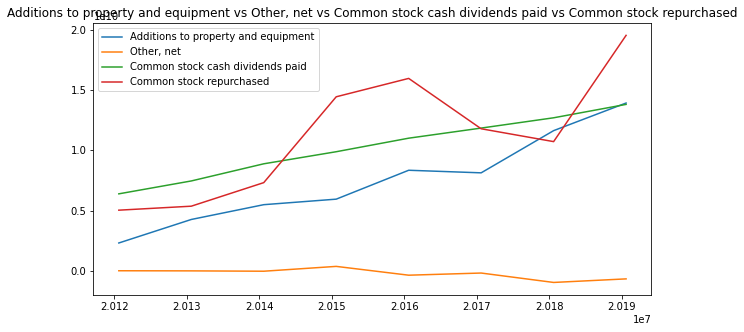

In [19]:
VisualizeRange(RF, [0, ])

In [52]:
%%time
RF = RangedFilings(tt, statement='IS')
RF

Compiling:  2019-Q3
b'Skipping line 374579: expected 9 fields, saw 10\n'
Compiling:  2018-Q3
Compiling:  2017-Q3
Compiling:  2016-Q3
b'Skipping line 100862: expected 9 fields, saw 10\n'
Compiling:  2015-Q3
Compiling:  2014-Q3
Compiling:  2013-Q3
Compiling:  2012-Q3
b'Skipping line 525305: expected 9 fields, saw 10\n'
Compiling:  2011-Q3
b'Skipping line 151260: expected 9 fields, saw 10\n'
b'Skipping line 209341: expected 9 fields, saw 10\nSkipping line 214597: expected 9 fields, saw 10\nSkipping line 251336: expected 9 fields, saw 10\n'
Compiling:  2010-Q3
Wall time: 3min 3s


,adsh,uom,plabel,20190630.0,20180630.0,20170630.0,20160630.0,20150630.0,20140630.0,20130630.0,20120630.0,20110630.0,20100630.0,qtrs,line,rank
0,0001564590-19-027952,USD,Revenue,1.258430e+11,1.103600e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,7.0,-1.0
1,0001564590-19-027952,USD,Cost of revenue,4.291000e+10,3.835300e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,-1.0
2,0001564590-19-027952,USD,Gross margin,8.293300e+10,7.200700e+10,5.568900e+10,5.254000e+10,6.054200e+10,5.989900e+10,NaN,NaN,NaN,NaN,4.0,9.0,-1.0
3,0001564590-19-027952,USD,Research and development,1.687600e+10,1.472600e+10,1.303700e+10,1.198800e+10,1.204600e+10,1.138100e+10,1.041100e+10,9.811000e+09,9.043000e+09,8.714000e+09,4.0,10.0,-1.0
4,0001564590-19-027952,USD,Sales and marketing,1.821300e+10,1.746900e+10,1.553900e+10,1.469700e+10,1.571300e+10,1.581100e+10,1.527600e+10,1.385700e+10,1.394000e+10,1.321400e+10,4.0,11.0,-1.0
5,0001564590-19-027952,USD,General and administrative,4.885000e+09,4.754000e+09,4.481000e+09,4.563000e+09,4.611000e+09,4.821000e+09,5.149000e+09,4.569000e+09,4.222000e+09,4.004000e+09,4.0,12.0,-1.0
6,0001564590-19-027952,USD,Restructuring,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,13.0,-1.0
7,0001564590-19-027952,USD,Operating income,4.295900e+10,3.505800e+10,2.232600e+10,2.018200e+10,1.816100e+10,2.775900e+10,2.676400e+10,2.176300e+10,2.716100e+10,2.409800e+10,4.0,14.0,-1.0
8,0001564590-19-027952,USD,"Other income, net",7.290000e+08,NaN,NaN,NaN,3.460000e+08,6.100000e+07,NaN,NaN,NaN,NaN,4.0,15.0,-1.0
9,0001564590-19-027952,USD,Income before income taxes,4.368800e+10,3.647400e+10,2.314900e+10,1.975100e+10,1.850700e+10,2.782000e+10,2.705200e+10,2.226700e+10,2.807100e+10,2.501300e+10,4.0,16.0,-1.0


In [50]:
def RangedFilings(filings: CompanyFilings, statement='BS', form='10-K') -> pd.DataFrame():
    filing_list = []
    subm = filings.sub[filings.sub['form'] == form]
    
    for i in range(1, subm.shape[0]):
        cadsh = subm['adsh'].iloc[i]
        print('Compiling: ', filings._get_directory(str(int(subm['filed'].iloc[i]))))
        filing_list.append(filings.extract_statement(cadsh, statement=statement)) # most time spent here

    filing_list[0].rename(columns={'value' : filing_list[0]['ddate'].iloc[0]}, inplace=True)
    cdf = filing_list[0]
    for f in range(1, len(filing_list)):
        val_date = str(filing_list[f]['ddate'].iloc[0])
        filing_list[f].rename(columns={'value' : val_date}, inplace=True)
        filing_list[f] = filing_list[f][['tag', 'plabel', val_date]]
        cdf = pd.merge(cdf, filing_list[f], on=['tag', 'plabel'], how='outer')
    
    cdf.drop_duplicates(subset=['tag'], inplace=True)
    cdf.drop(['tag', 'version','ddate', 'dimh', 'iprx'],axis=1, inplace=True)
    cdf.insert(len(cdf.columns)-1, 'qtrs', cdf.pop('qtrs'))
    cdf.insert(len(cdf.columns)-1, 'line', cdf.pop('line'))
    cdf.insert(len(cdf.columns)-1, 'rank', cdf.pop('rank'))
    cdf.insert(1, 'uom', cdf.pop('uom'))
    cdf.fillna(0)
    return cdf

In [26]:
# final class for company filings
class CompanyFilings:
    # , num: pd.DataFrame(), pre: pd.DataFrame(), dim: pd.DataFrame(), sub: pd.DataFrame(), tag: pd.DataFrame()
    def __init__(self, ticker=' ', cik=-1):
        self.ticker = ticker.lower()
        self.cik = cik
        self._valid_statements = ['BS','CF','IS']
        self._valid_forms = ['10-K', '10-Q']
        self._valid_timeframes = ['yearly', 'quarterly']
        if self.cik == -1:
            self.collect_filings(cik=False)
        else:
            self.collect_filings(cik=True)
    
    # TODO
    # - add NLP functionality
    # - add 8-K functionality -- not yet supported by xbrl 
    #@dask.delayed
    def extract_statement(self, adsh: str, statement='BS') -> pd.DataFrame():
        form_type = self.sub[self.sub['adsh'] == adsh]['form'].iloc[0]
        date_filed = self.sub[self.sub['adsh'] == adsh]['filed'].iloc[0]
        dim  = self.collect_dim(str(date_filed))
        data_tags = self.collect_tag(adsh)
        
        cnum = self.collect_num(adsh)
        cpre = self.collect_pre(adsh, stmt=statement)

        if statement == 'IS':
            # income statement is period-dependant
            qtr = 4 # base is 4 quarters (annual report)
            if form_type == '10-Q':
                qtr = 1
            common_tags = pd.merge(cnum[cnum['qtrs'] == qtr], cpre[['tag','plabel', 'line']], on='tag')
        else:
            common_tags = pd.merge(cnum, cpre[['tag','plabel', 'line']], on='tag')
        
        promoted_dims = self._promote_dimh(cnum, cpre, dim)
        extract_promoted = self._extract_promoted(common_tags, promoted_dims, data_tags)
        return extract_promoted

    def collect_num(self, adsh: str) -> pd.DataFrame():
        numd = PropD.NUM
        numo = {key:value[len(value)-1] for (key,value) in numd.items()}

        date_filed = self.sub[self.sub['adsh'] == adsh]['filed'].iloc[0]
        period = self.sub[self.sub['adsh'] == adsh]['period'].iloc[0]
        fdir = self._get_directory(str(date_filed))
        
        qt = 4
        if self.sub[self.sub['adsh'] == adsh]['form'].iloc[0] == '10-Q':
            qt = 1
        
        num = dd.read_csv(f'F:\LPS\SEC_DB\{fdir}\\num.tsv', sep='\t', dtype=numo, error_bad_lines=False)
        cnum = num[(num.adsh == adsh) & (num.ddate == period) & (num.qtrs.isin([qt, 0]))].compute()
        cnum.drop_duplicates(subset=['tag','dimh','value'],inplace=True)
        return cnum

    def collect_pre(self, adsh: str, stmt='BS') -> pd.DataFrame():
        prep = PropD.PRE
        pred = {key:value[len(value)-1] for (key,value) in prep.items()}

        date_filed = self.sub[self.sub['adsh'] == adsh]['filed'].iloc[0]
        fdir = self._get_directory(str(date_filed))
        pre = dd.read_csv(f'F:\LPS\SEC_DB\{fdir}\\pre.tsv', sep='\t', dtype=pred, error_bad_lines=False, blocksize=None) #bad...
        
        cpre = pre[(pre.adsh == adsh) & (pre.stmt == stmt)].compute()
        cpre.sort_values(by='line', inplace=True)
        return cpre

    def collect_tag(self, adsh: str) -> pd.DataFrame():
        tog = PropD.TAG
        togd = {key:value[len(value)-1] for (key,value) in tog.items()}

        date_filed = self.sub[self.sub['adsh'] == adsh]['filed'].iloc[0]
        fdir = self._get_directory(str(date_filed))
        tag = pd.read_csv(f'F:\LPS\SEC_DB\{fdir}\\tag.tsv', sep='\t', dtype=togd, error_bad_lines=False)
        return tag

    def collect_dim(self, date_filed: int) -> pd.DataFrame():
        dime = PropD.DIM
        dimed = {key:value[len(value)-1] for (key,value) in dime.items()}

        fdir = self._get_directory(date_filed)
        dim = dd.read_csv(f'F:\LPS\SEC_DB\{fdir}\\dim.tsv', sep='\t', dtype=dimed, error_bad_lines=False)
        dim = dim.compute()
        return dim
    
    def collect_filings(self, cik=False) -> pd.DataFrame():
        subd = PropD.SUB
        subdd = {key:value[len(value)-1] for (key,value) in subd.items()}

        load = dd.read_csv('F:\LPS\SEC_DB\*\sub.tsv', blocksize=16 * 1024 * 1024, sep='\t', dtype=subdd)
        if cik == True:
            subm = load[load.cik == self.cik].compute(scheduler='processes', num_workers=4)
        elif cik == False:
            subm = load[load.instance.str.contains(f'^{self.ticker}-')].compute(scheduler='processes', num_workers=4)
        self.sub = subm.sort_values(by='filed', ascending=False)
        return self.sub 

    # -----------------------------------------------

    def _get_quarter(self, month:str) -> str:
        if month[0] == '0':
            month = month[1]
        month = int(month)
        if month < 4:
            return 'Q1'
        elif month < 7:
            return 'Q2'
        elif month < 10:
            return 'Q3'
        elif month <= 12:
            return 'Q4'

    def _get_directory(self, date: str) -> str:
        #20091231
        #YYYY MM DD
        regstr =  date[:4] +'-'+ self._get_quarter(date[4:6])
        return regstr

    # filtering and extracting data from the datasets
    # selects [terms with brackets] from the dataframe, and adds them to a list
    def _dimensionals(self, pre: pd.DataFrame()) -> list: 
        dimensional = pre[pre['plabel'].str.contains(r'\[', na=False)]['plabel']
        labels = []
        for i in range(1, dimensional.shape[0]):
            current = dimensional.iloc[i]
            row_buffer = ''
            for letter in current:
                if letter == ' ':
                    continue
                elif letter == '[':
                    break
                else:
                    row_buffer += letter
            if row_buffer not in labels:
                labels.append(row_buffer)
            else:
                continue
        return labels

    # splits dimension arguments into a parseable list
    def _dim_splitter(self, dimslice: pd.DataFrame()) -> list:
        segs = dimslice.split(';')[:-1]
        key_values = [x.split('=') for x in segs]
        return key_values

    # creates ranking based on how many 'hits' each value's dimhash value had (compared to the _dimensionals found)
    def _promote_dimh(self, num: pd.DataFrame(), pre: pd.DataFrame(), dim: pd.DataFrame()) -> dict:
        hashes = dim[dim['dimhash'].isin(num['dimh'])]
        plabels = self._dimensionals(pre)

        hash_rank = {}
        hash_rank.update({'0x00000000' : -1})
        for i in range(hashes.shape[0]):
            ranking = 0
            if hashes['dimhash'].iloc[i] == '0x00000000':
                continue

            segmented = self._dim_splitter(hashes['segments'].iloc[i])
            for kv in segmented:
                for val in kv:
                    if val in plabels:
                        ranking += 1
            hash_rank.update({hashes['dimhash'].iloc[i] : ranking})
        return hash_rank

    # the actual ranking engine, selects the most relevant values based on their dimhash ranking and iprx value
    def _extract_promoted(self, common_tags: pd.DataFrame(), promoted_dims: dict, data_tags: pd.DataFrame()) -> pd.DataFrame():
        df_list = []
        uniq = list(common_tags['tag'].unique())
        
        i = 0
        for tag in uniq:
            matches = common_tags[common_tags['tag'] == tag]
            matches['rank'] = [promoted_dims[ky] for ky in matches['dimh']]
            
            rmax = matches['rank'].max()
            rmin = matches['rank'].min()
            imin = matches['iprx'].min()

            if rmax > 0:
                up_match = matches[matches['rank'] == rmax]
                if up_match.shape[0] > 1:
                    up_match = up_match[up_match['iprx'] == imin]
            else:
                up_match = matches[matches['rank'] == rmin]
                if up_match.shape[0] > 1:
                    up_match = up_match[up_match['iprx'] == imin]
            df_list.append(up_match)
            i += 1

        # econt = pd.concat(df_list)
        ep = pd.concat(df_list)
        # ep = self._verify_crdr(econt, data_tags)
        ep.insert(1, 'plabel', ep.pop('plabel'))
        ep.insert(2, 'value', ep.pop('value'))
        ep.drop(['footnote', 'dimn', 'coreg', 'durp', 'datp', 'dcml', 'footlen'], axis=1, inplace=True)
        ep.sort_values(by='line', inplace=True)
        ep.dropna(how='all', inplace=True)
        ep.fillna(0)
        return ep

In [10]:
prep = PropD.PRE
pred = {key:value[len(value)-1] for (key,value) in prep.items()}
pred

{'adsh': str,
 'report': int,
 'line': int,
 'stmt': str,
 'inpth': bool,
 'rfile': str,
 'tag': str,
 'version': str,
 'plabel': str}

In [ ]:
soup.find_all('a')

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import zipfile, io

In [ ]:
# script to collect all download links
URL = 'https://www.sec.gov/dera/data/financial-statement-and-notes-data-set.html'
r = requests.get(URL)

soup = BeautifulSoup(r.content, 'html5lib')

downloads = soup.find_all(href=re.compile('financial-statement-and-notes-data-sets'))
dlink = ["https://www.sec.gov/" + downloads[i]['href'] for i in range(len(downloads))] 

In [ ]:
# downloads and extracts entire database from SEC website
def download_entire_database(dlinks: list, downloads):
    i = 0
    for link in downloads:
        fname = link.string.replace(" ", "-")
        os.mkdir(r"F:\LPS\SEC_DB" + "\\" + fname)
        
        print(f"Now Downloading: {fname}... ")
        r = requests.get(dlinks[i], stream=True)
        
        zipper = zipfile.ZipFile(io.BytesIO(r.content))
        print(f"Extracting {fname}...")
        zipper.extractall(r"F:\LPS\SEC_DB" + "\\" + fname)
        
        print(f"Downloaded and Extracted {fname}.\n")
        i += 1

In [ ]:
download_entire_database(dlinks, downloads)

In [ ]:
import mysql.connector
from mysql.connector import Error

In [ ]:
def create_db_connection(host_name, user_name, user_password):
    connection = None
    try: 
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            auth_plugin='mysql_native_password'
        )
        print("MySQL Database connection successful.")
    except Error as err:
        print(f'Error: {err}')
    return connection

In [ ]:
connection = create_db_connection('localhost', 'root', 'IupA;ka3&js')

In [ ]:
def create_database(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Database created successfully")
    except Error as err:
        print(f'Error: {err}')

In [ ]:
db_query = "CREATE DATABASE sec_db"
create_database(connection, db_query)

# ARCHIVED FUNCTIONS
Who knows, maybe they'll be useful again someday...

In [ ]:
# ARCHIVED
# helper function
# turns all tags found in dim.tsv into a pandas dataset, w/ correlated dimhash 
def searchable_dimensions(dim: pd.DataFrame()) -> pd.DataFrame():
    all_tags = []
    c=0 
    for i in range(dim.shape[0]):
        if type(dim['segments'].iloc[i]) == float:
            continue
        
        current = dim['segments'].iloc[i]
        start = 0
        stop = 0 
        for letter in current:
            if letter == ';' or letter == '=':
                all_tags.append([current[start:stop], dim['dimhash'].iloc[i]])
                start = stop+1
                c += 1
            stop+=1

        if i % 1000 == 0:
            print(i, end=' ')

    all_possible_tags = pd.DataFrame(all_tags, columns=['tag', 'dimhash'])
    all_possible_tags.dropna(how='any', inplace=True)
    all_possible_tags.drop_duplicates(inplace=True)
    return all_possible_tags

In [ ]:
# ARCHIVED dimensionals
dimensional = pre[pre['plabel'].str.contains(r'\[', na=False)]['plabel']
    labels = []
    for i in range(1, dimensional.shape[0]):
        current = dimensional.iloc[i]
        row_buffer = ''
        start = 0
        c = 0 
        for letter in current:
            if letter == ']' or letter == '}':
                break
            elif letter == '[' or letter == ':':
                start = c+1
            c += 1
        labels.append(current[start:c])

In [ ]:
# ARCHIVED
# all tags with common ranking
for tag in uniq:
    matches = common_tags[common_tags['tag'] == tag]
    matches['rank'] = [promoted_dims[ky] for ky in matches['dimh']]
    lmax = matches['rank'].max()
    lmin = matches['rank'].min()
    if matches.shape[0] > 1:
        if lmax == lmin:
            display(matches)

In [ ]:
%%time
# ARCHIVED
# opens relevant .tsv filings
os.chdir(r'F:/LPS/2021_02_notes')

sub = pd.read_csv('sub.tsv', sep='\t', header=0)
num = pd.read_csv('num.tsv', sep='\t', header=0)
pre = pd.read_csv('pre.tsv', sep='\t', header=0)
dim = pd.read_csv('dim.tsv', sep='\t', header=0)
txt = pd.read_csv('txt.tsv', sep='\t', header=0)
data_tags = pd.read_csv('tag.tsv', sep='\t', header=0)

In [ ]:
# ARCHIVED
# income statement is over set period of time, check qtrs 
isnum = collect_num('0000012927-21-000011', 20201231, num)
ispre = collect_pre('0000012927-21-000011', 20201231, pre, stmt='IS')

promoted_dims = promote_dimh(isnum, ispre, dim)
ct = pd.merge(isnum[isnum['qtrs'] == 4], ispre[['tag','plabel', 'line']], on='tag')
i_s = extract_promoted(ct, promoted_dims, data_tags) 
i_s